In [4]:
import sys
try:
  import google.colab
  IN_COLAB = True
except:
  IN_COLAB = False

if IN_COLAB:
    # montar el drive, que es donde tenemos el dataset
    from google.colab import drive
    drive.mount("/content/drive")
    data_dir = "/content/drive/MyDrive/2023/Publica/Alumnos/"
    sys.path.append(data_dir)
else:
    import os
    data_dir = os.path.dirname(os.path.abspath('Programacion de IA')) + "/"

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [9]:
filename = data_dir + 'Medals.xlsx'
df = pd.read_excel(filename)
df.head()   # Para ver los primeros registros

c:\Users\daniel.martinezcarre\AppData\Local\miniconda3\envs\ia\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,Rank,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total
0,1,United States of America,39,41,33,113,1
1,2,People's Republic of China,38,32,18,88,2
2,3,Japan,27,14,17,58,5
3,4,Great Britain,22,21,22,65,4
4,5,ROC,20,28,23,71,3


In [10]:
df.describe()

,Rank,Gold,Silver,Bronze,Total,Rank by Total
count,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000
mean,46.333333,3.655914,3.634409,4.322581,11.612903,43.494624
std,26.219116,7.022471,6.626339,6.210372,19.091332,24.171769
min,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,24.000000,0.000000,0.000000,1.000000,2.000000,23.000000
50%,46.000000,1.000000,1.000000,2.000000,4.000000,47.000000
75%,70.000000,3.000000,4.000000,5.000000,11.000000,66.000000
max,86.000000,39.000000,41.000000,33.000000,113.000000,77.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Rank           93 non-null     int64 
 1   Team/NOC       93 non-null     object
 2   Gold           93 non-null     int64 
 3   Silver         93 non-null     int64 
 4   Bronze         93 non-null     int64 
 5   Total          93 non-null     int64 
 6   Rank by Total  93 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 5.2+ KB


In [13]:
df['Pais'] = df['Team/NOC']
df.drop(['Team/NOC'], axis = 1, inplace = True)
df

,Rank,Gold,Silver,Bronze,Total,Rank by Total,Pais
0,1,39,41,33,113,1,United States of America
1,2,38,32,18,88,2,People's Republic of China
2,3,27,14,17,58,5,Japan
3,4,22,21,22,65,4,Great Britain
4,5,20,28,23,71,3,ROC
...,...,...,...,...,...,...,...
88,86,0,0,1,1,77,Ghana
89,86,0,0,1,1,77,Grenada
90,86,0,0,1,1,77,Kuwait
91,86,0,0,1,1,77,Republic of Moldova


In [23]:
#df = df.set_index('Pais')
df.loc['Spain']

Rank             22
Gold              3
Silver            8
Bronze            6
Total            17
Rank by Total    17
Name: Spain, dtype: int64

> Ordenar por ranking

In [25]:
df.sort_values("Rank")
df = df[:10]
df

,Rank,Gold,Silver,Bronze,Total,Rank by Total
Pais,,,,,,
United States of America,1,39,41,33,113,1
People's Republic of China,2,38,32,18,88,2
Japan,3,27,14,17,58,5
Great Britain,4,22,21,22,65,4
ROC,5,20,28,23,71,3
Australia,6,17,7,22,46,6
Netherlands,7,10,12,14,36,9
France,8,10,12,11,33,10
Germany,9,10,11,16,37,8


[Text(1, 0, 'United States of America'),
 Text(2, 0, "People's Republic of China"),
 Text(3, 0, 'Japan'),
 Text(4, 0, 'Great Britain'),
 Text(5, 0, 'ROC'),
 Text(6, 0, 'Australia'),
 Text(7, 0, 'Netherlands'),
 Text(8, 0, 'France'),
 Text(9, 0, 'Germany'),
 Text(10, 0, 'Italy')]

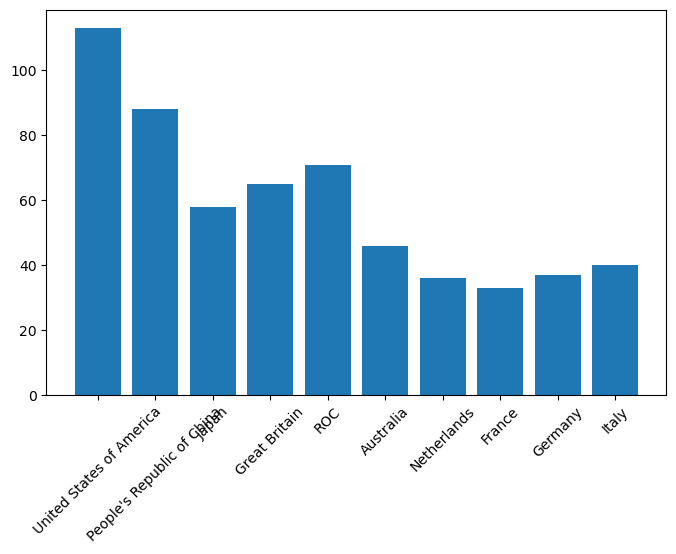

In [31]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(1,1,1)
ax.bar(df["Rank"], df["Total"])

ax.set_xticks(df['Rank'])
ax.set_xticklabels(df.index, rotation=45)   # Porque 'Pais' es indice

> Reemplazar nombre de datos

In [36]:
#df = df.reset_index()
df["Pais"] = df["Pais"].str.replace("United States of America", "EEUU")
df["Pais"] = df["Pais"].str.replace("People's Republic of China", "China")
df

,index,Pais,Rank,Gold,Silver,Bronze,Total,Rank by Total
0,0,EEUU,1,39,41,33,113,1
1,1,China,2,38,32,18,88,2
2,2,Japan,3,27,14,17,58,5
3,3,Great Britain,4,22,21,22,65,4
4,4,ROC,5,20,28,23,71,3
5,5,Australia,6,17,7,22,46,6
6,6,Netherlands,7,10,12,14,36,9
7,7,France,8,10,12,11,33,10
8,8,Germany,9,10,11,16,37,8
9,9,Italy,10,10,10,20,40,7


[Text(1, 0, 'EEUU'),
 Text(2, 0, 'China'),
 Text(3, 0, 'Japan'),
 Text(4, 0, 'Great Britain'),
 Text(5, 0, 'ROC'),
 Text(6, 0, 'Australia'),
 Text(7, 0, 'Netherlands'),
 Text(8, 0, 'France'),
 Text(9, 0, 'Germany'),
 Text(10, 0, 'Italy')]

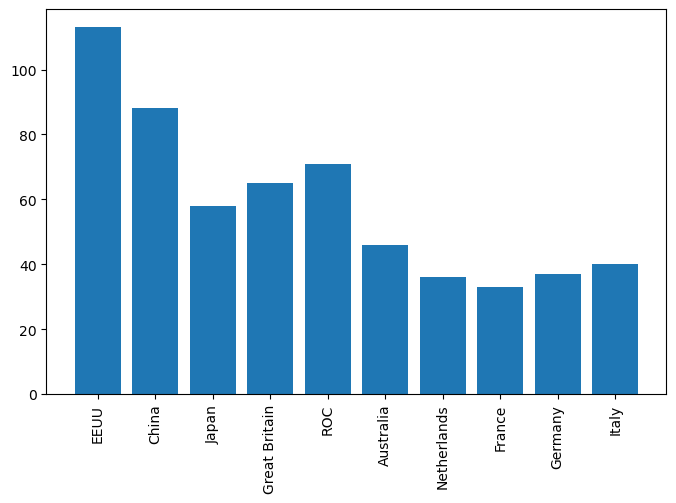

In [38]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(1,1,1)
ax.bar(df["Rank"], df["Total"])

ax.set_xticks(df["Rank"])
ax.set_xticklabels(df['Pais'], rotation=90)

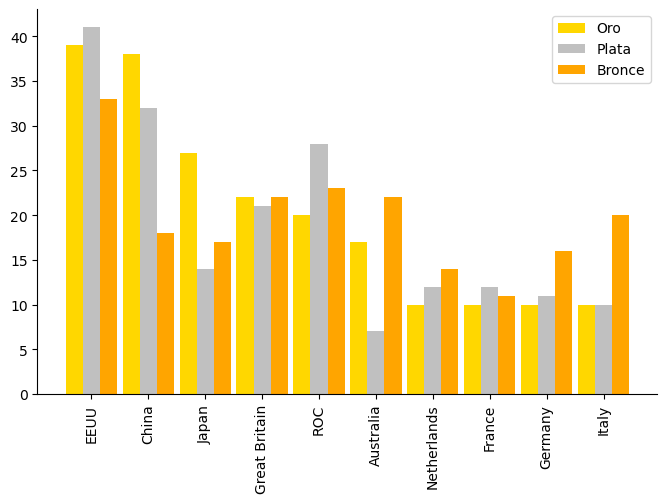

In [40]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(1,1,1)

ancho = 0.3
ax.bar(df["Rank"]-ancho, df["Gold"], ancho, color="gold", label="Oro")
ax.bar(df["Rank"], df["Silver"], ancho, color="silver", label="Plata")
ax.bar(df["Rank"]+ancho, df["Bronze"], ancho, color="orange", label="Bronce")

ax.set_xticks(df["Rank"])
ax.set_xticklabels(df['Pais'], rotation=90)
ax.legend()
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

## Ficheros CSV

In [43]:
import sys
try:
  import google.colab
  IN_COLAB = True
except:
  IN_COLAB = False

if IN_COLAB:
    # montar el drive, que es donde tenemos el dataset
    from google.colab import drive
    drive.mount("/content/drive")
    data_dir = "/content/drive/MyDrive/2023/Publica/Alumnos/"
    sys.path.append(data_dir)
else:
    import os
    data_dir = os.path.dirname(os.path.abspath('Programacion de IA')) + "/"

filename = data_dir + 'tiobe-2020-clean.csv'
df = pd.read_csv(filename)
df.head()

,Language,Ratings
0,C,17.38
1,Java,11.96
2,Python,11.72
3,C++,7.56
4,C#,3.95


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Language  20 non-null     object 
 1   Ratings   20 non-null     float64
dtypes: float64(1), object(1)
memory usage: 448.0+ bytes


C:\Users\daniel.martinezcarre\AppData\Local\Temp\ipykernel_12912\1418537212.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df['Language'], rotation=90)   # Porque 'Pais' es indice


[Text(0, 0, 'C'),
 Text(1, 0, 'Java'),
 Text(2, 0, 'Python'),
 Text(3, 0, 'C++'),
 Text(4, 0, 'C#'),
 Text(5, 0, 'Visual Basic'),
 Text(6, 0, 'JavaScript'),
 Text(7, 0, 'PHP'),
 Text(8, 0, 'R'),
 Text(9, 0, 'Groovy'),
 Text(10, 0, 'Assembly language'),
 Text(11, 0, 'SQL'),
 Text(12, 0, 'Swift'),
 Text(13, 0, 'Go'),
 Text(14, 0, 'Ruby'),
 Text(15, 0, 'MATLAB'),
 Text(16, 0, 'Perl'),
 Text(17, 0, 'Objective-C'),
 Text(18, 0, 'Delphi/Object Pascal'),
 Text(19, 0, 'Classic Visual Basic')]

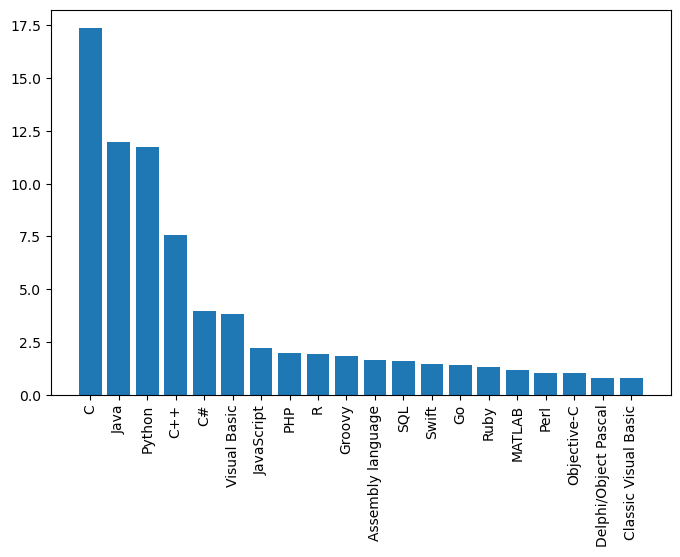

In [46]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(1,1,1)
ax.bar(df["Language"], df["Ratings"])

#ax.set_xticks(df['Rank'])
ax.set_xticklabels(df['Language'], rotation=90)   # Porque 'Pais' es indice

TypeError: <lambda>() takes 1 positional argument but 2 were given

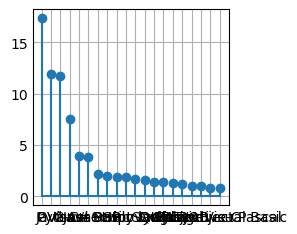

In [49]:
plt.style.use('_mpl-gallery')

# make data
x = df["Language"]
y = df["Ratings"]

# plot
fig, ax = plt.subplots()

ax.stem(x, y)

ax.set(df["Language"],
       ylim=df["Ratings"])

ax.set_xticklabels(df['Language'], rotation=90)